# Advanced Fisheries Economics Workshop

## Bio-economic modelling: the open-access fisheries model
### Long-run or static model


We will start with the Gordon-Schaefer fisheries model.

The stock grows according the following equation:

$$\frac{dx(t)}{dt} = rx(t)(1-\frac{x(t)}{K}) - Y(x(t),E(t))$$

where $Y(x,E)$ is the yiled , catch or havest as a finction of the stock and total fishing effort.






The dynamics can also be given in discrete-time we will see that in this model it doesn't matter whether time is discrete or continuous. However, this is not always the case.

In dscrete-time the stock grows according to

$$X_{t+1} - X_t = r X_t (1 - \frac{X_t}{K} - Y(X_t,E_t))$$

Let's assume $Y(X,E) = q X E$


## Steady -State and sustainability


In steady-state either $\frac{dx}{dt} = 0$ or $X_{t+1} - X_t = 0$. In steady-state we can ignore any subscripts for time or indices because the solution will be independent of time.

In steady-state the stock is unchanging so we can interet the steady-state as being a situation where the fishery is sustainable in the strong sense.





In steady-state:

$$r X (1- \frac{X}{K}) - q X E = 0$$

Let's use SymPy to solve this for $X$.


In [112]:
from sympy import *

In [113]:
 r, X, K, q, E = symbols('r X K q E')
    
eqn = r*X*(1- X/K) - q*X*E 

In [114]:
sol = solve(eqn, X)
sol #finds all solutions There are two.

[0, -E*K*q/r + K]

In [115]:
print('X:',simplify(sol[1])) # provides the non-trivial solution sol[1] selects the second solution sol[0] 
# the first, try it!

X: K*(-E*q + r)/r


## Rent


$$\Pi = p q X(E) E = c E$$

where

- $p$ is the ex-vessel price of fish
- $q$ is the catchability of fish
- $X(E)$ The stock as a fiunction of toal fishing effort, we just derived this aboe
- $E$ total fishing effort
- $c$ the cost of fishing per unit of effort

the next step is to subnstitute the stock $X(E)$ into the rent equation



In [116]:
p, q, c = symbols('p q c')
rent = p*q*X*E - c*E
simplify(rent.subs(X,sol[1]))

-E*(K*p*q*(E*q - r) + c*r)/r

This the total rent as a function of $E$ which is a variable and the rest are cosntants. 

We can also calculate the yield or catch separately

In [117]:

Y = q*X*E
Y = Y.subs(X,sol[1]) #normally this is a bad idea
Yss = Y.subs(E,Emsy)
Yss #sustainable yield

E*q*(-E*K*q/r + K)

Let's plot this against total effort $E$

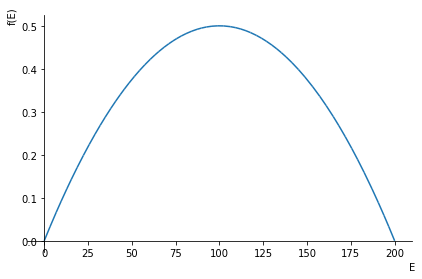

In [118]:
from sympy.plotting import plot

plot(E*0.01*(1 - E*1*0.01/2),(E, 0, 200),show='TRUE')  #you need to choose some values for K,q,r

We want to find the maximum of the sustaiable yield curve. Because maximum sustaiable yield has often been used as a goal for fisheries management. As economiststs we wish to know whether it isa good goal or whether we can do better.

In [119]:
focY = diff(Y,E)
Emsy = solve(diff(Y,E),E)
Emsy[0]

r/(2*q)

In [120]:
MSY  = Y.subs(E,Emsy[0])
#q*sol[1].subs(E,Emsy)

## At what level of stocks is sustainable yield maximized?


In [121]:
sol[1].subs(E,Emsy[0]) # This repalces $ in the equation X(E) with Emsy

K/2

This is an interesting result. why? Firstly, we have assumed a steady-state and we know that if no fishing 
were occurring then in steady-state the stock $X = K$. So the stock level that would result in steady-state would be $50\%$ of unfished biomass.This is interesting us is gives us a basis for understanding debates concerning target refernce points in the region. Are they close to the maximum economic yield leve of stock. 

So what we have done is 

- assume a steady-state (sustainability)

- solve for the level of stock in steady-state as a function of foishing effort 

- we have maximized yield by varying total fishing effort to find the effort level that maiximizes yield $E_{MSY}$.

- We then susbitute this into the yield/catch equation to find the maximum sustainable yield $MSY$

- The results do not depend on data but they do depend on the model assumptions (logistic growth of the stock and the multiplicative catch equation, the catch per unit effort fisheries production function). 




## Rent maximization


So we wish to maximize the rent

$$\Pi (E) = p q X(E) E - c E$$

by varying totl fishing effort.

the key question is how much fishing effort gives the greatest economic return? We already know that this is a quadratic equation because the sustainable yield equation is quadratic, so a maximum exists.

Let's first do this graphically.



In [122]:
revenue = p*Yss
print(revenue)
revenuess = revenue.subs({p:1000,K:1,q:0.01,r:1.2})

E*p*q*(-E*K*q/r + K)


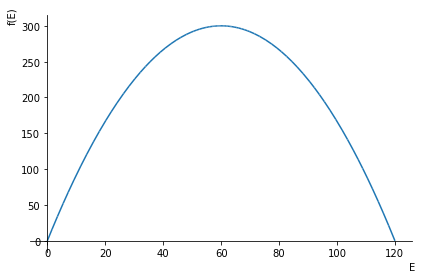

In [123]:
plot(revenuess,(E,0,120))

Let's add the total costs $c E$.

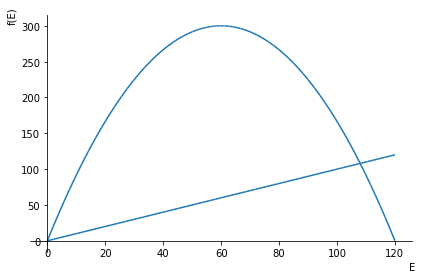

In [124]:

plot(revenuess,1*E,(E,0,120))

In [125]:
rentss = rent.subs(X,sol[1]) # Rent is given by this (don't worry about the order of things.
# You can check it is correct by comparing with the previous slide. This is the steady-state rent
rentss

-E*c + E*p*q*(-E*K*q/r + K)

In [126]:
focrent = diff(rentss,E)
focrent

-E*K*p*q**2/r - c + p*q*(-E*K*q/r + K)

In [127]:
Emey = solve(rentss,E)
simplify(Emey[1])

r/q - c*r/(K*p*q**2)

so what did we do?


- We first defined rent mathematically

- We then plotted revenue and costs

- we then maximized total rent by varying total effort $E$ to find $E_{MEY}$.

- we have done this without using any data.

- For this to be useful we need to some values for  $r,q,c,p,K$

- We know the ex-vessel price more or less, or can at least estimate it from the market price or import prices

- $c$ is typically hard to obtain. There are a couple of options: 1) survey vessel operators, 2) calculate it from other data and published research reports.

- $r,q,K$ are biological parameters that need to be estimated from catch and effort data (SPC provides us with this data). This comes from log-book data verified by observers.

